In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [3]:
df = pd.read_csv('survey.csv', delimiter = ';').dropna(how='all', axis='columns').dropna(how = 'any', axis = 'rows')
df.head()
# df.id = df.id.astype('int32')
# df.subject_id = df.subject_id.astype('int32')
display(df.head())

info_d = {
    'subject_count' : [df.subject_id.nunique()],
    'sample_count' : [len(df)],
    'avg_time_s' : [np.round(np.mean(df.time))]
}
display(pd.DataFrame(info_d))

,id,subject_id,image_id,question,short_answer,reasoned_answer,time
0,1.0,1.0,sample_001,What time does the photo is taken?,Approximately at afternoon around 1 PM,Because it is very sunny and there is no exist...,538.0
1,2.0,1.0,sample_001,Why the man carrying a purple backpack?,Because he is carrying things for the baby,"The man is pushing a stroller, which indicates...",538.0
2,3.0,1.0,sample_001,Why there is a lobster logo on the middle food...,Because it is selling a lobster,Because there is a lobster logo on it.,538.0
3,4.0,1.0,sample_001,What thing is between the pillars?,A tree,Because the shapes is like a tree with many le...,538.0
4,5.0,1.0,sample_001,What is the object on top of the gate?,Black statues,Because there is an abstract formation on the ...,538.0


,subject_count,sample_count,avg_time_s
0,8,100,406.0


In [5]:
import re
import json
from datetime import datetime

JSON_PARENT_PATH = ''
JSON_PATH = JSON_PARENT_PATH + f"sample_{datetime.now().strftime('%d%m%H%M')}.json"

def extract_sample_data(df, output_json_path = JSON_PATH):
    # Extract QAs result
    ids, subject_ids, img_ids, time = df.id.values, df.subject_id.values, df.image_id.values, df.time.values
    questions, short_answers, reasoned_answers = df.question.values, df.short_answer.values, df.reasoned_answer.values
    
    data = [
        {
            "id" : i,
            "subject_id": subject_id,
            "img_id": img_id,
            "time": t,
            "question":q,
            "short_answer":sa,
            "reasoned_answer":ra
        } for i, subject_id, img_id, t, q, sa, ra in zip(ids,subject_ids,img_ids,time,questions,short_answers,reasoned_answers)
    ]
    

    with open(output_json_path, 'w') as json_file:
        json.dump(data, json_file, indent=2)

extract_sample_data(
    df = df
)

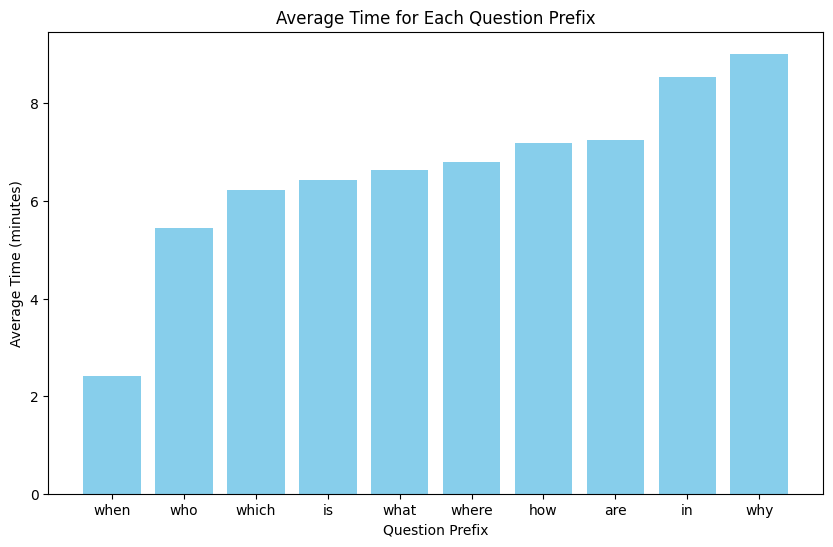

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Assuming 'time' column is in seconds, you can convert it to minutes for better readability

df['time_minutes'] = df['time'] / 60  # converting time to minutes

# Extracting the question prefix
df['question_prefix'] = df['question'].str.split().str[0].str.lower()

# Grouping by question prefix and calculating the average time for each group
result_df = df.groupby('question_prefix').agg({'time_minutes': 'mean'}).reset_index()

# Sorting by average time
result_df = result_df.sort_values(by='time_minutes')

# Visualizing the results using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(result_df['question_prefix'], result_df['time_minutes'], color='skyblue')
plt.xlabel('Question Prefix')
plt.ylabel('Average Time (minutes)')
plt.title('Average Time for Each Question Prefix')
plt.show()


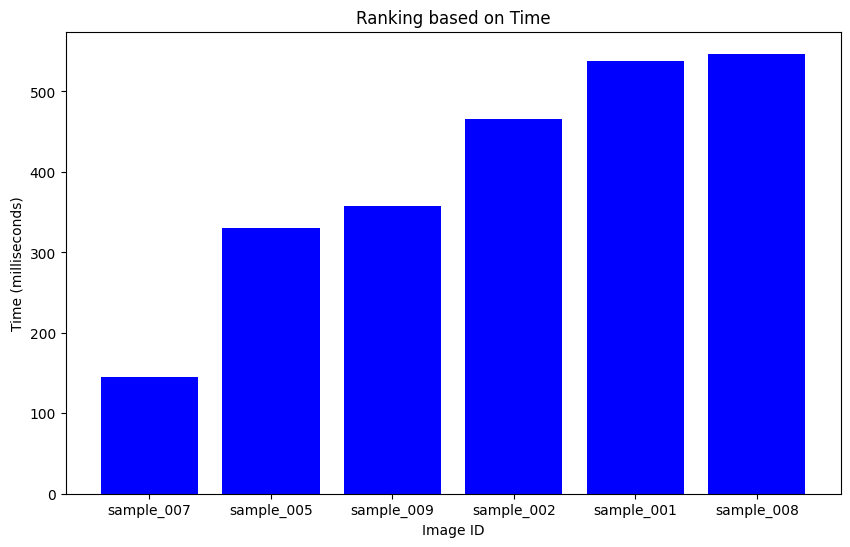

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named df
# If not, you can load your data using pd.read_csv or any other method

# Convert 'time' column to numeric for sorting
df['time'] = pd.to_numeric(df['time'])

# Sort the DataFrame based on 'time' in ascending order
df_sorted = df.sort_values(by='time')

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['image_id'], df_sorted['time'], color='blue')
plt.xlabel('Image ID')
plt.ylabel('Time (milliseconds)')
plt.title('Ranking based on Time')
plt.show()


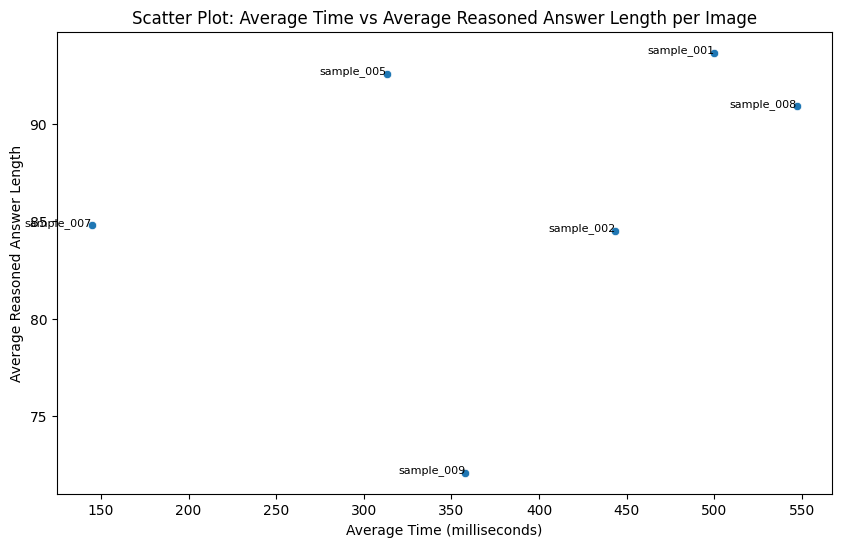

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a DataFrame named df
# If not, you can load your data using pd.read_csv or any other method

# Convert 'time' column to numeric for sorting
df['time'] = pd.to_numeric(df['time'])

# Calculate the average time for each image
df_avg = df.groupby('image_id')['time'].mean().reset_index()

# Calculate the length of reasoned answer for each image
df['reasoned_answer_length'] = df['reasoned_answer'].apply(len)

# Calculate the average reasoned answer length for each image
df_avg_length = df.groupby('image_id')['reasoned_answer_length'].mean().reset_index()

# Merge the average time and average reasoned answer length DataFrames
df_merged = pd.merge(df_avg, df_avg_length, on='image_id')

# Create a scatter plot with labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='time', y='reasoned_answer_length', data=df_merged)

# Add labels for each point
for i, row in df_merged.iterrows():
    plt.text(row['time'], row['reasoned_answer_length'], f'{row["image_id"]}', fontsize=8, ha='right')

plt.xlabel('Average Time (milliseconds)')
plt.ylabel('Average Reasoned Answer Length')
plt.title('Scatter Plot: Average Time vs Average Reasoned Answer Length per Image')
plt.show()
